In [9]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import dagshub
dagshub.init(repo_owner='Vedclove', repo_name='NYC-Yellow-Taxi', mlflow=True)

Initialized MLflow to track repo "Vedclove/NYC-Yellow-Taxi"

Repository Vedclove/NYC-Yellow-Taxi initialized!

In [ ]:
import pandas as pd
from src.config import TRANSFORMED_DATA_DIR

df = pd.read_parquet(TRANSFORMED_DATA_DIR / "tabular_data.parquet")

In [6]:
df

,rides_t-672,rides_t-671,rides_t-670,rides_t-669,rides_t-668,rides_t-667,rides_t-666,rides_t-665,rides_t-664,rides_t-663,...,rides_t-7,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,pickup_hour,pickup_location_id,target
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2023-01-29,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-01-30,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-01-31,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-02-01,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-02-02,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87615,25,14,5,3,7,16,53,133,126,136,...,62,62,58,50,48,42,37,2023-12-27,263,12
87616,30,7,9,6,5,23,58,123,136,108,...,64,79,65,71,72,75,35,2023-12-28,263,19
87617,50,26,17,9,8,11,43,116,137,132,...,81,78,60,85,63,62,37,2023-12-29,263,38
87618,117,88,39,19,14,12,27,37,70,97,...,84,75,100,98,88,77,69,2023-12-30,263,59


In [7]:
import pandas as pd
from pathlib import Path
import pyarrow.parquet as pq

month = 1
year = 2023
path = Path("..") / "data" / "processed" / f"rides_{year}_{month:02}.parquet"

table = pq.read_table(path)
rides = table.to_pandas()
rides.iloc[1000:1020]

,pickup_datetime,pickup_location_id
1000,2022-01-01 00:14:17,236
1001,2022-01-01 00:37:17,262
1002,2022-01-01 00:06:28,234
1003,2022-01-01 00:24:05,162
1004,2022-01-01 00:48:07,162
1005,2022-01-01 00:05:13,137
1006,2022-01-01 00:38:42,238
1007,2022-01-01 00:47:48,142
1008,2022-01-01 00:12:29,170
1009,2022-01-01 00:24:24,79


In [8]:
rides["pickup_hour"] = rides["pickup_datetime"].dt.floor('h')
agg_rides = rides.groupby(["pickup_hour", "pickup_location_id"]).size().reset_index()
agg_rides.rename(columns={0: "rides"}, inplace=True)
agg_rides.tail()

,pickup_hour,pickup_location_id,rides
65024,2022-01-31 23:00:00,249,76
65025,2022-01-31 23:00:00,256,3
65026,2022-01-31 23:00:00,261,4
65027,2022-01-31 23:00:00,262,8
65028,2022-01-31 23:00:00,263,26


ADF Statistic: -3.6223524483678777
p-value: 0.00534779797586073


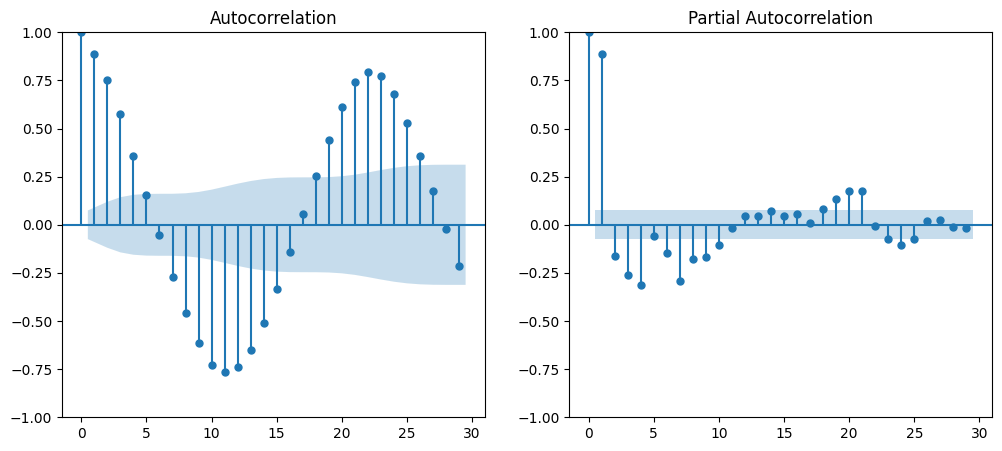

/opt/anaconda3/envs/yellowtaxi/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/yellowtaxi/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/yellowtaxi/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/yellowtaxi/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an int

                               SARIMAX Results                                
Dep. Variable:                  rides   No. Observations:                  693
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -3038.667
Date:                Mon, 03 Mar 2025   AIC                           6089.335
Time:                        21:58:18   BIC                           6116.581
Sample:                             0   HQIC                          6099.872
                                - 693                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.9666      1.960     30.077      0.000      55.124      62.809
ar.L1          1.8709      0.019     98.835      0.000       1.834       1.908
ar.L2         -0.9458      0.018    -51.149      0.0

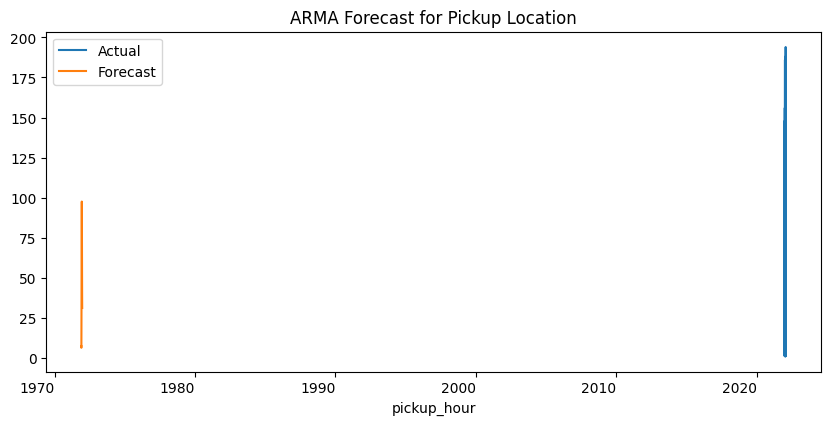

In [12]:
# Load dataset (Assuming df is already loaded with pickup_hour, pickup_location_id, rides)
# Ensure datetime format
agg_rides['pickup_hour'] = pd.to_datetime(agg_rides['pickup_hour'])

# Select a specific pickup_location_id (optional)
ts_data = agg_rides[agg_rides['pickup_location_id'] == 43].set_index('pickup_hour')['rides']

# Check for stationarity
result = adfuller(ts_data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If non-stationary, apply differencing
if result[1] > 0.05:
    ts_data = ts_data.diff().dropna()

# Plot ACF & PACF to determine p, q
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(ts_data, ax=ax[0])
plot_pacf(ts_data, ax=ax[1])
plt.show()

# Define ARMA model (assuming p=2, q=2 based on PACF/ACF plots)
model = ARIMA(ts_data, order=(2, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

# Forecasting
forecast_steps = 24  # Predict next 24 hours
forecast = model_fit.forecast(steps=forecast_steps)

# Plot results
plt.figure(figsize=(10,5))
ts_data.plot(label='Actual', legend=True)
forecast.plot(label='Forecast', legend=True)
plt.title(f'ARMA Forecast for Pickup Location')
plt.show()